# Setup

You'll want to set file paths here.

For Xenium data, 

```
wget https://cf.10xgenomics.com/samples/xenium/1.6.0/Xenium_V1_hColon_Non_diseased_Base_FFPE/Xenium_V1_hColon_Non_diseased_Base_FFPE_outs.zip
```

If you need to unzip the spatial/cells file:

`unzip Xenium_V1_hColon_Non_diseased_Base_FFPE_outs.zip Xenium_V1_hColon_Non_diseased_Base_FFPE_outs`

`tar -xvf Xenium_V1_hColon_Non_diseased_Base_FFPE_outs/cells.csv.gz`

(replacing <file_path_spatial> and <data_dir> with the paths to the cells.csv.gz file and the data directory).


In [28]:
%load_ext autoreload
%autoreload 2

from crispr import Spatial
import scanpy as sc
import squidpy as sq
import os
import pandas as pd

ddd = os.path.join(os.path.expanduser("~"), str(
    "projects/data/public/xenium/Xenium_V1_hColon_Non_diseased_Base_FFPE_outs"
    ))
fpd, fps = "cell_feature_matrix.h5", "cells.csv"
file_path, file_path_spatial = [os.path.join(ddd, x) for x in [fpd, fps]]

genes = ["CDKN1A", "CDKN2A", "TP53", "PLAUR", 
         "PTGER4", "ATG16L1", "NOD2", "LACC1"]

pd.options.display.max_columns = 100


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Object

In [29]:
self = Spatial(file_path, file_path_spatial=file_path_spatial, 
               visium=False, col_cell_type="majority_voting")



<<< INITIALIZING SPATIAL CLASS OBJECT >>>



<<< INITIALIZING CRISPR CLASS OBJECT >>>

col_gene_symbols='gene_symbols'
col_cell_type='majority_voting'
col_sample_id=np.nan
col_batch=np.nan
col_condition=np.nan
col_num_umis=np.nan
key_control=np.nan
key_treatment=np.nan

<<< LOADING 10X .h5 FILE /home/elizabeth/elizabeth/projects/data/public/xenium/Xenium_V1_hColon_Non_diseased_Base_FFPE_outs/cell_feature_matrix.h5 >>>
H5 File Format (/home/elizabeth/elizabeth/projects/data/public/xenium/Xenium_V1_hColon_Non_diseased_Base_FFPE_outs/cell_feature_matrix.h5)




Cell Counts: Raw

270984


Gene Counts: Raw



 AnnData object with n_obs × n_vars = 270984 × 325
    var: 'gene_ids', 'feature_types', 'genome'
    layers: 'counts'


 AnnData object with n_obs × n_vars = 270984 × 325
    var: 'gene_ids', 'feature_types', 'genome'
    layers: 'counts'
                     gene_ids    feature_types   genome
gene_symbols                                           
ABCC8         ENSG00000006071  Gen

# Processing Data

## Preprocessing

AnnData object with n_obs × n_vars = 270984 × 325
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_counts', 'log_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'
    layers: 'counts'

Un-Used Keyword Arguments: {'assay_protein': None, 'col_sample_id': None, 'col_batch': None, 'col_condition': None, 'col_num_umis': None}




Cell Counts: Initial

270984


Gene Counts: Initial

None 

 10 

                gene_ids    feature_types   genome
count               325              325      325
unique              325                1        1
top     ENSG00000006071  Gene Expression  Unknown
freq                  1              325      325 



<<< PERFORMING QUALITY CONTROL ANALYSIS>>>


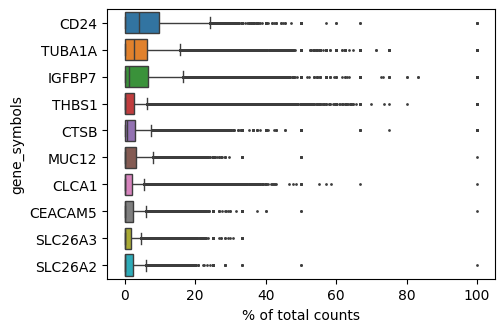


	*** Detecting Mitochondrial, Ribosomal, Hemoglobin genes...

	*** Calculating & plotting QC metrics...




... storing 'feature_types' as categorical
... storing 'genome' as categorical


'NoneType' object has no attribute 'get_legend_handles_labels'
       n_cells_by_counts  mean_counts  log1p_mean_counts  \
count         325.000000   325.000000         325.000000   
mean        28002.689231     0.259540           0.184309   
std         32263.039555     0.537291           0.266181   
min           194.000000     0.000731           0.000730   
25%          5468.000000     0.025216           0.024903   
50%         15713.000000     0.080920           0.077812   
75%         37897.000000     0.248587           0.222012   
max        199589.000000     6.258665           1.982196   

       pct_dropout_by_counts  total_counts  log1p_total_counts  
count             325.000000  3.250000e+02          325.000000  
mean               89.666294  7.033106e+04            9.972191  
std                11.905884  1.455971e+05            1.645456  
min                26.346574  1.980000e+02            5.293305  
25%                86.015041  6.833000e+03            8.829665  
50%   

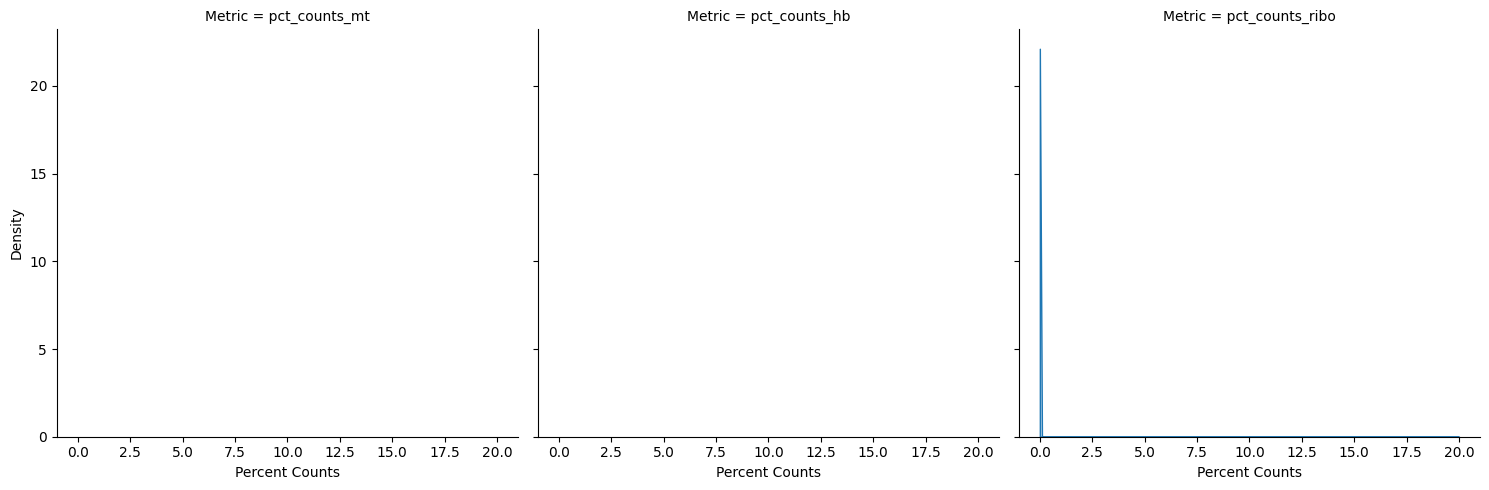

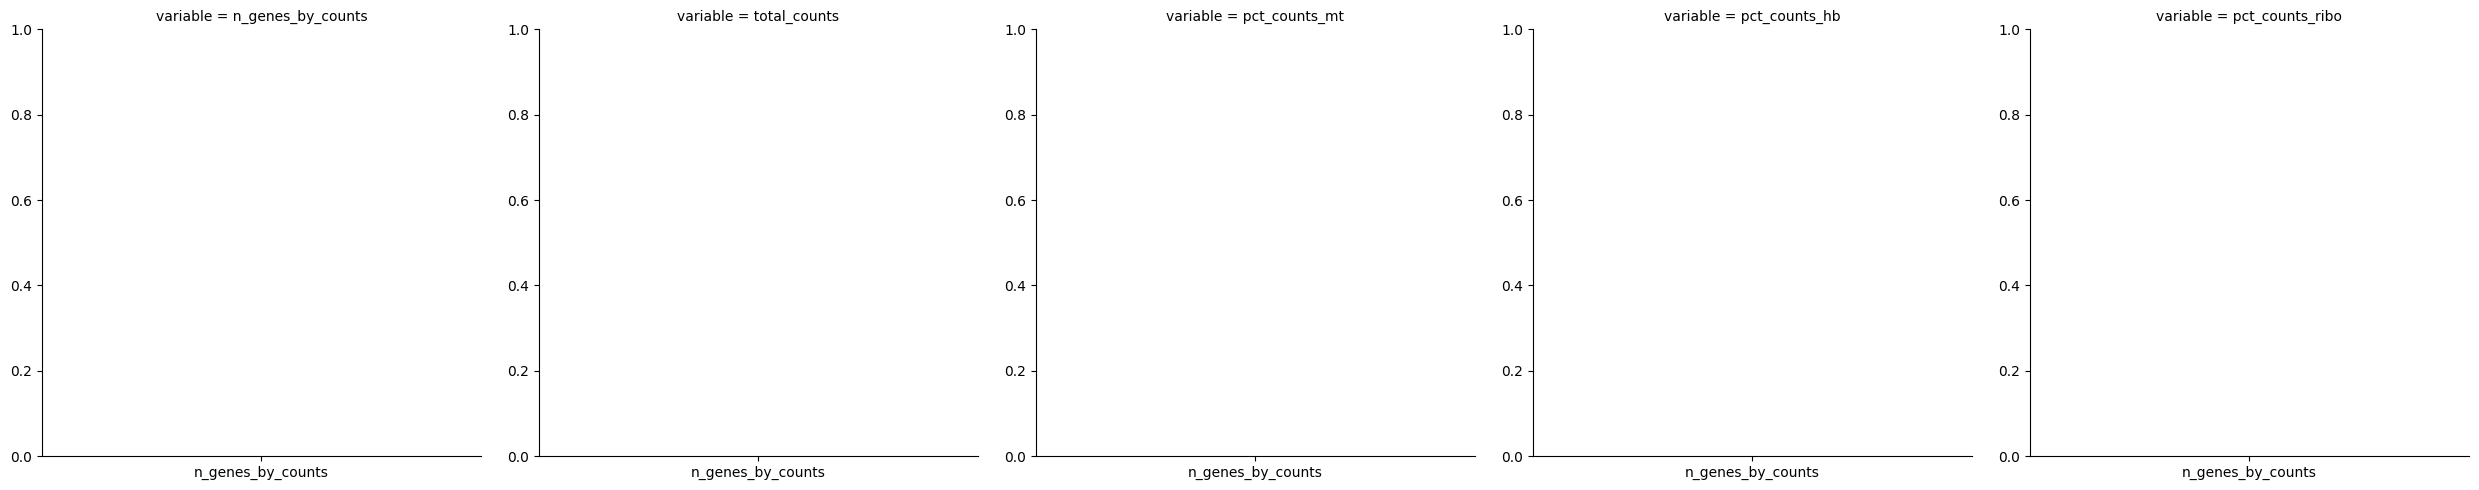

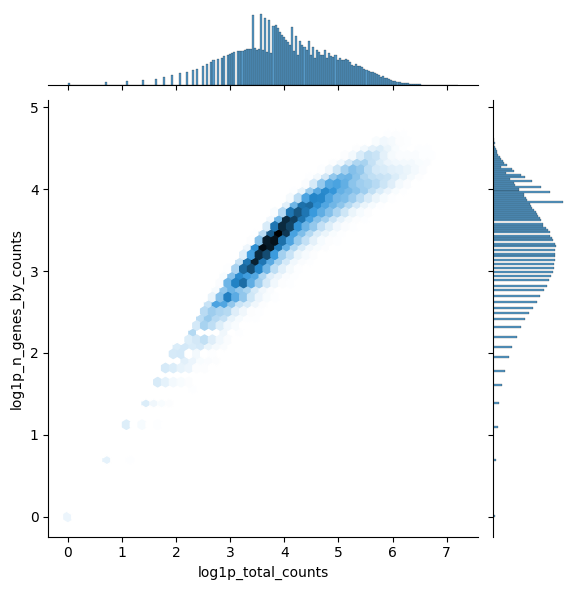

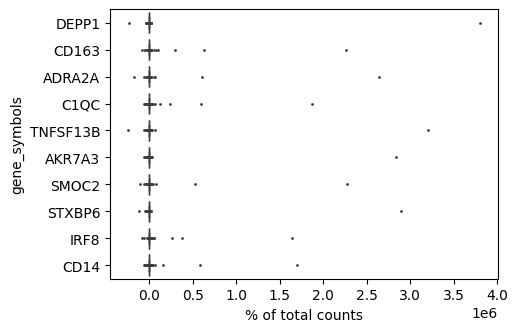


	*** Detecting Mitochondrial, Ribosomal, Hemoglobin genes...

	*** Calculating & plotting QC metrics...


'NoneType' object has no attribute 'get_legend_handles_labels'
       n_cells_by_counts   mean_counts  log1p_mean_counts  \
count              325.0  3.250000e+02       3.250000e+02   
mean            270788.0  4.427060e-07       4.425755e-07   
std                  0.0  1.617188e-05       1.617184e-05   
min             270788.0 -4.976294e-05      -4.976418e-05   
25%             270788.0 -7.836218e-06      -7.836249e-06   
50%             270788.0  1.603856e-07       1.603856e-07   
75%             270788.0  8.561614e-06       8.561577e-06   
max             270788.0  5.743466e-05       5.743302e-05   

       pct_dropout_by_counts  total_counts  log1p_total_counts       means  \
count                  325.0    325.000000          202.000000  325.000000   
mean                     0.0      0.119879            0.798388    2.589499   
std                      0.0      4.379150    

(AnnData object with n_obs × n_vars = 270788 × 325
     obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_counts', 'log_counts', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo'
     var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
     uns: 'log1p', 'hvg'
     obsm: 'spatial'
     layers: 'counts', 'log1p', 'scaled',
 {'qc_metrics': {'highly_expressed_genes': None,
   'pct_counts_kde': <sea

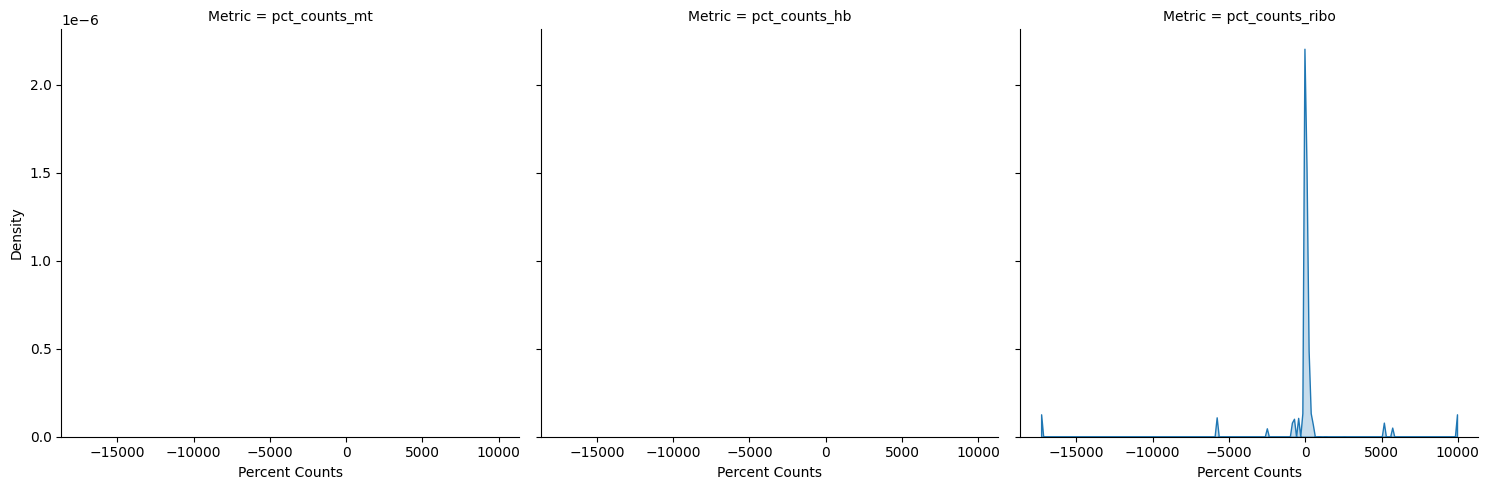

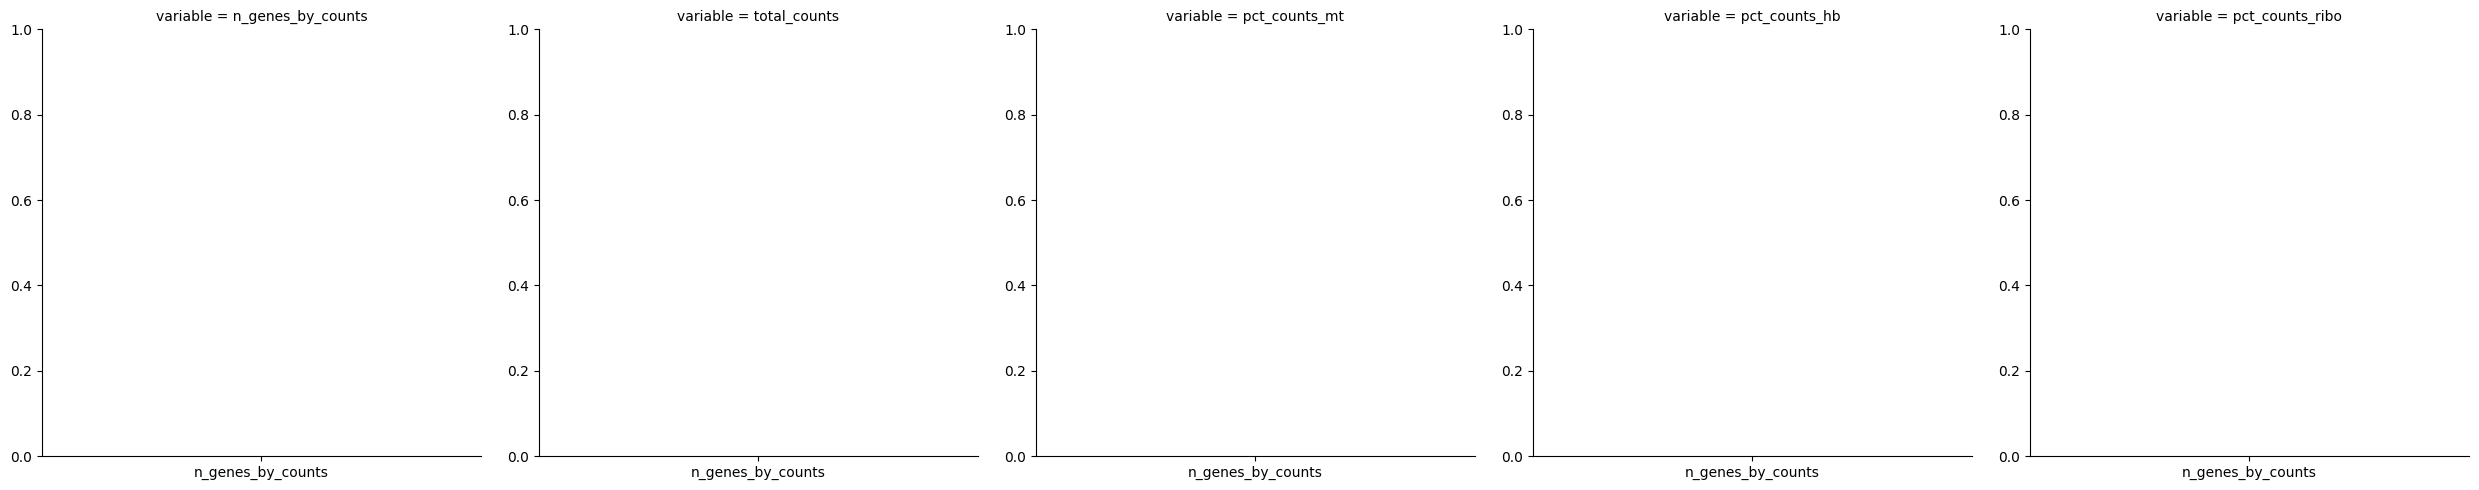

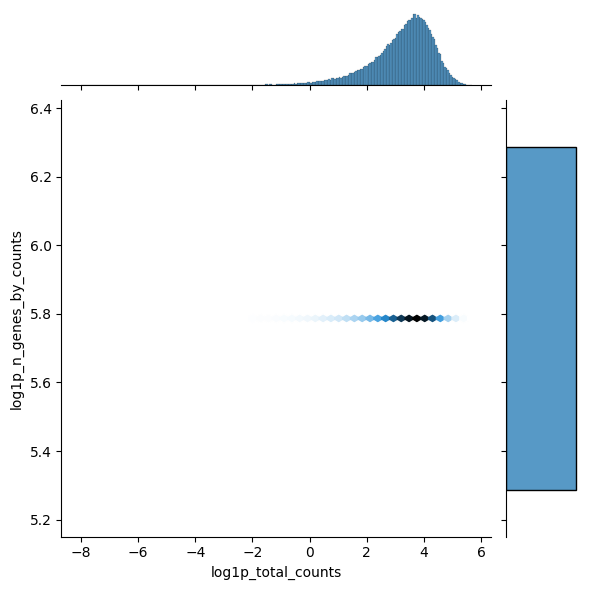

In [31]:
self.preprocess(regress_out=None)

## Clustering

In [32]:
_ = self.cluster()

Un-used Keyword Arguments: {'assay': None, 'col_gene_symbols': 'gene_symbols', 'col_cell_type': 'majority_voting', 'col_sample_id': None, 'col_batch': None, 'col_condition': None, 'col_num_umis': None, 'key_control': None, 'key_treatment': None}


<<< PERFORMING PCA >>>

 {'use_highly_variable': True}


<<< COMPUTING NEIGHBORHOOD GRAPH >>>



<<< EMBEDDING: UMAP >>>


<<< CLUSTERING WITH LEIDEN METHOD >>>


## Annotation

In [ ]:
_ = self.annotate_clusters("Cells_Intestinal_Tract.pkl")

# Analysis

You can run everything in a one-liner command:
```
self.analyze_spatial(genes=genes, method_autocorr="moran", alpha=0.005, 
                     n_perms=10, seed=1618, figsize_multiplier=2)
```

You can also run the steps of the overall workflow separately. Here are some examples running parts of the workflow (sometimes illustrating further customization options). 

## Basic Plots

In [ ]:
_ = self.plot(color=genes, shape="circle")
_ = self.plot(color="predicted_labels")

In [ ]:
anchor_key = 192
adata = self.adata.copy()
col_cell_type = None

if not col_cell_type:
    col_cell_type = self._columns["col_cell_type"]
sq.tl.var_by_distance(adata, genes, col_cell_type, spatial_key=self._assay_spatial)
sq.pl.var_by_distance(adata, genes, anchor_key)

## Spatial Graph Information

In [ ]:
self.calculate_centrality()  # run

## Co-Occurrence of Cell Types

We'll first randomly choose three clusters to focus the plots on, then run the analysis.


In [ ]:
kct = list(self.rna.obs[self._columns["col_cell_type"]].sample(3))
_ = self.find_cooccurrence(key_cell_type=kct, figsize=(40, 20), wspace=3,
                           kws_plot=dict(palette="tab20"))

## Neighbors Enrichment Analysis

In [ ]:
_ = self.calculate_neighborhood()  # analyze enrichment

## Spatially-Variable Genes

In [ ]:
self.find_svgs(genes=genes, method="moran", shape="hex", n_perms=10)

## Receptor-Ligand Interactions

In [ ]:
res, fig = self.calculate_receptor_ligand(
    key_source=None, key_targets=None, pvalue_threshold=0.0005, 
    remove_nonsig=True, alpha=0.00005, hspace=0.2)